In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from xgboost import DMatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

Dataset Info

In [2]:
data = pd.read_csv('payment-practices.csv')

In [3]:
data.columns

Index(['Report Id', 'Start date', 'End date', 'Filing date', 'Company',
       'Company number', 'Payments made in the reporting period',
       'Average time to pay', '% Invoices paid within 30 days',
       '% Invoices paid between 31 and 60 days',
       '% Invoices paid later than 60 days',
       '% Invoices not paid within agreed terms',
       'Shortest (or only) standard payment period',
       'Longest standard payment period', 'Maximum contractual payment period',
       'Payment terms have changed', 'Suppliers notified of changes',
       'Participates in payment codes', 'E-Invoicing offered',
       'Supply-chain financing offered',
       'Policy covers charges for remaining on supplier list',
       'Charges have been made for remaining on supplier list', 'URL'],
      dtype='object')

In [4]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/77681)*100})
missing_data

,total_missing,perc_missing
Report Id,0,0.000000
Start date,0,0.000000
End date,0,0.000000
Filing date,0,0.000000
Company,0,0.000000
Company number,0,0.000000
Payments made in the reporting period,14673,18.888789
Average time to pay,6859,8.829701
% Invoices paid within 30 days,6859,8.829701
% Invoices paid between 31 and 60 days,6859,8.829701


In [5]:
data.dropna(subset=['Average time to pay'],inplace=True)

In [6]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/77681)*100})
missing_data

KeyboardInterrupt: 

In [ ]:
l = ['Average time to pay', '% Invoices paid between 31 and 60 days',
       'Shortest (or only) standard payment period',
       'Longest standard payment period', 'Maximum contractual payment period',
       'Payment terms have changed', 'Participates in payment codes',
       'E-Invoicing offered', 'Supply-chain financing offered',
       'Charges have been made for remaining on supplier list', 'flag']
x = []

In [ ]:
data.drop(columns=['Report Id',
 'Start date',
 'End date',
 'Filing date',
 'Company',
 'Company number',
 'Payments made in the reporting period',
 '% Invoices paid within 30 days',
 '% Invoices paid later than 60 days',
 'Suppliers notified of changes',
 'Policy covers charges for remaining on supplier list',
 'URL'],inplace=True)

In [ ]:
data.head()

,Average time to pay,% Invoices paid between 31 and 60 days,% Invoices not paid within agreed terms,Shortest (or only) standard payment period,Longest standard payment period,Maximum contractual payment period,Payment terms have changed,Participates in payment codes,E-Invoicing offered,Supply-chain financing offered,Charges have been made for remaining on supplier list
0,25.0,20.0,89.0,30.0,60.0,60.0,False,False,True,False,False
1,69.0,28.0,0.0,30.0,NaN,75.0,False,False,False,False,False
2,21.0,9.0,47.0,2.0,30.0,30.0,False,False,False,False,True
3,14.0,8.0,31.0,2.0,30.0,30.0,False,False,False,False,True
4,15.0,2.0,14.0,2.0,30.0,30.0,False,False,False,False,False


In [ ]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/77681)*100})
missing_data

,total_missing,perc_missing
Average time to pay,0,0.000000
% Invoices paid between 31 and 60 days,0,0.000000
% Invoices not paid within agreed terms,0,0.000000
Shortest (or only) standard payment period,0,0.000000
Longest standard payment period,23773,30.603365
Maximum contractual payment period,0,0.000000
Payment terms have changed,0,0.000000
Participates in payment codes,0,0.000000
E-Invoicing offered,0,0.000000
Supply-chain financing offered,0,0.000000


In [ ]:
data.dropna(inplace=True)

In [ ]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/77681)*100})
missing_data

,total_missing,perc_missing
Average time to pay,0,0.0
% Invoices paid between 31 and 60 days,0,0.0
% Invoices not paid within agreed terms,0,0.0
Shortest (or only) standard payment period,0,0.0
Longest standard payment period,0,0.0
Maximum contractual payment period,0,0.0
Payment terms have changed,0,0.0
Participates in payment codes,0,0.0
E-Invoicing offered,0,0.0
Supply-chain financing offered,0,0.0


In [ ]:
data.dtypes

Average time to pay                                      float64
% Invoices paid between 31 and 60 days                   float64
% Invoices not paid within agreed terms                  float64
Shortest (or only) standard payment period               float64
Longest standard payment period                          float64
Maximum contractual payment period                       float64
Payment terms have changed                                object
Participates in payment codes                               bool
E-Invoicing offered                                       object
Supply-chain financing offered                            object
Charges have been made for remaining on supplier list     object
dtype: object

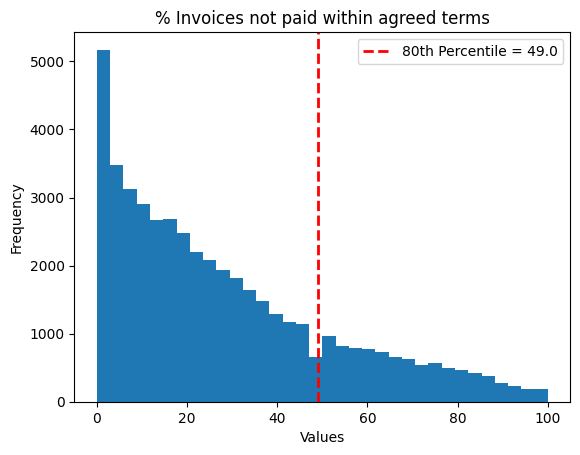

In [ ]:
# Finding 80th Quantile
import numpy as np
percentile_80 = np.percentile(data['% Invoices not paid within agreed terms'].dropna(), 80)
plt.hist(data['% Invoices not paid within agreed terms'],bins=34)
plt.axvline(x=percentile_80, color='red', linestyle='dashed', linewidth=2, label='80th Percentile = '+str(percentile_80))

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('% Invoices not paid within agreed terms')

# Show the plot
plt.legend()
plt.show()

In [ ]:
# creating target variable using '% Invoices not paid within agreed terms' feature
data['flag'] = 0
data.loc[data['% Invoices not paid within agreed terms'] > percentile_80, 'flag'] = 1
data.drop(columns=['% Invoices not paid within agreed terms'],inplace=True)

<Axes: >

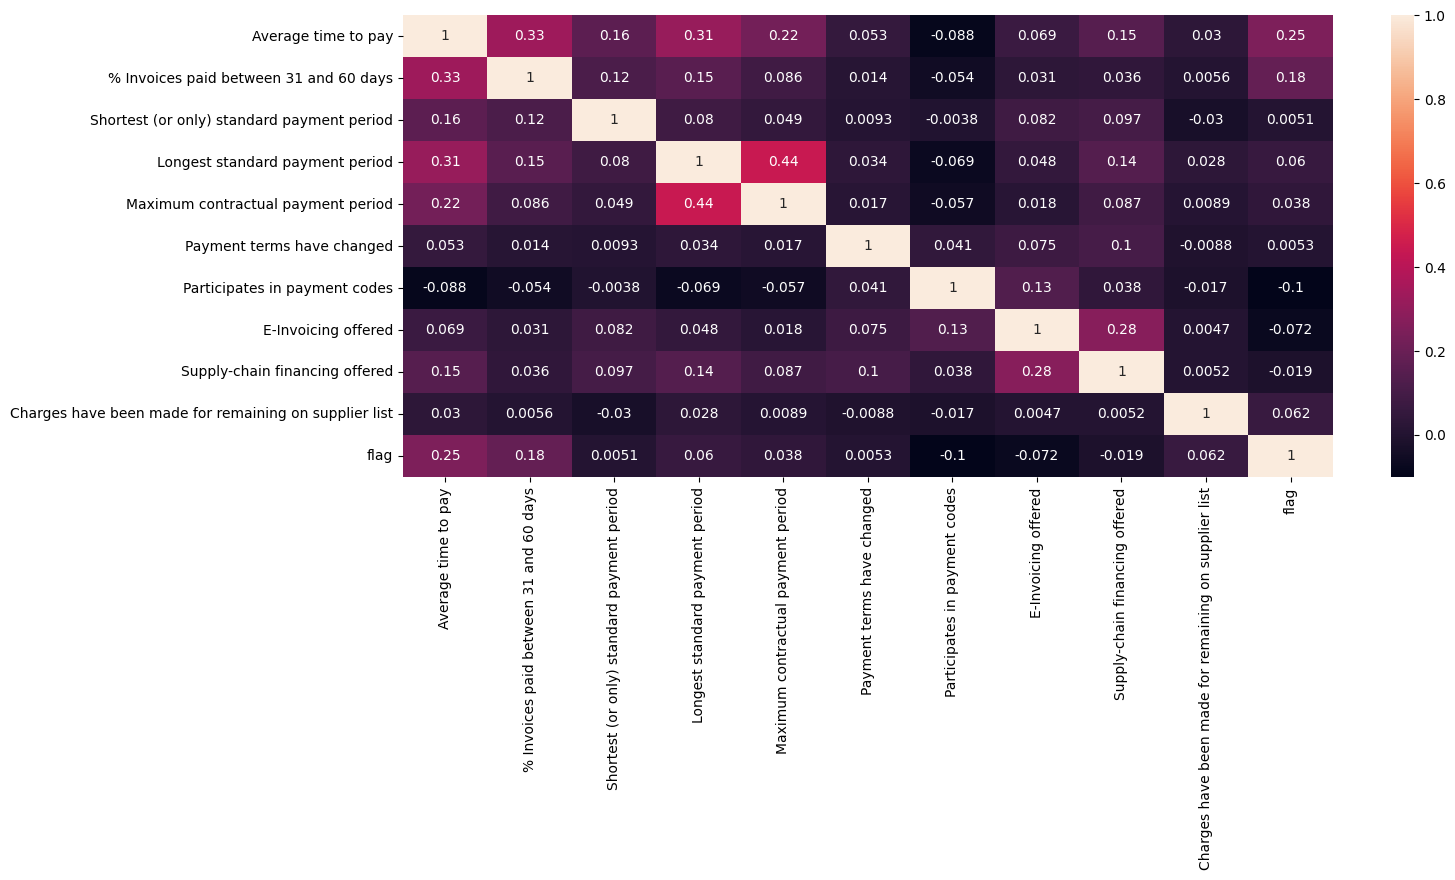

In [ ]:
# Correlation Analysis
plt.figure(figsize=(15, 6))
sns.heatmap(data.corr(),annot=True)

In [ ]:
# Coverting the object to boolean format
data = data.astype({'Payment terms have changed': 'bool',
                    'Participates in payment codes': 'bool',
                    'E-Invoicing offered': 'bool',
                    'Supply-chain financing offered': 'bool',
                    'Charges have been made for remaining on supplier list': 'bool'})

In [ ]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')

# Separate the features and target
X = data.drop('flag', axis=1)
y = data['flag']

# Oversample the data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Print the new class distribution
print(f"New class distribution: {y_resampled.value_counts(normalize=True)}")

New class distribution: flag
1    0.5
0    0.5
Name: proportion, dtype: float64


In [ ]:
data = pd.DataFrame(X_resampled, columns=X.columns)  # Use original feature names
data["flag"] = y_resampled  # Add target variable
data = data.sample(frac=1, random_state=42)  # Set random state for reproducibility

In [ ]:
categorical_features = ['Payment terms have changed','Participates in payment codes','E-Invoicing offered','Supply-chain financing offered','Charges have been made for remaining on supplier list']
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_df = pd.concat([data, pd.DataFrame(encoder.fit_transform(data[categorical_features]))], axis=1)
encoded_df.drop(columns=[0],inplace=True)
encoded_df.dtypes

Average time to pay                                      float64
% Invoices paid between 31 and 60 days                   float64
Shortest (or only) standard payment period               float64
Longest standard payment period                          float64
Maximum contractual payment period                       float64
Payment terms have changed                                  bool
Participates in payment codes                               bool
E-Invoicing offered                                         bool
Supply-chain financing offered                              bool
Charges have been made for remaining on supplier list       bool
flag                                                       int64
dtype: object

In [ ]:
dmatrix = DMatrix(encoded_df.drop('flag', axis=1), encoded_df[categorical_features], enable_categorical=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(encoded_df.drop('flag', axis=1), encoded_df['flag'], test_size=0.3, random_state=42)
import xgboost as xgb
dtrain = DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = DMatrix(X_test, label=y_test, enable_categorical=True)

params = {
    'objective': 'binary:logistic',
    'nthread': 6,
}

bst = xgb.train(params, dtrain, num_boost_round=100)

ypred = bst.predict(dtest)

ypred_bin = (ypred > 0.5).astype(int)

accuracy = accuracy_score(y_test, ypred_bin)
print('Accuracy:', accuracy)

Accuracy: 0.7810921231823573


In [ ]:
'''# Coverting the object to boolean format
data = data.astype({'Payment terms have changed': 'bool',
                    'Participates in payment codes': 'bool',
                    'E-Invoicing offered': 'bool',
                    'Supply-chain financing offered': 'bool',
                    'Policy covers charges for remaining on supplier list': 'bool',
                    'Charges have been made for remaining on supplier list': 'bool'})'''

In [2]:
import tensorflow as tf
tf.__version__

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates